In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn

In [2]:
parents_dict = pickle.load(open("../../CAR_data/upstream_node_dict", "rb"))
expression_sc = pd.read_csv("../../CAR_data/log_sc_expr_with_celltypes.csv")
expression_marker_genes = pd.read_csv("../../CAR_data/marker_genes_log_sc_expr_with_celltypes.csv")
raw_counts = pd.read_csv("../../CAR_data/raw_counts_post_qc_genes_of_interest.csv")

In [3]:
TFs = pickle.load(open("../../CAR_data/TF_list", "rb"))
TFs.remove("AP1")

# Try to predict cell type as a function of CAR expression level 

**Actually not a good idea because the expression we have is not representative of CAR expression. Ask Rocio about it**

In [4]:
CARs = ["41BB", "CTLA4", "CD40", "IL15Ra", "CD28"]
cell_type_marker = ["CD4", "CD8A", "CD8B"]

def encode_function(string, list_of_functions):
    return(list_of_functions.index(string))

expression_sc[cell_type_marker] = expression_marker_genes[cell_type_marker]
cell_functions = list(np.unique(expression_sc["cell_type"]))
expression_sc["function_encoded"] = expression_sc["cell_type"].apply(encode_function, args = (cell_functions,))
#raw_counts["function_encoded"] = raw_counts["cell_type"].apply(encode_function, args = (cell_functions,))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


X, X_test = train_test_split(expression_sc, test_size=0.1, random_state=1)
scaler = MinMaxScaler()
X_scaled = X.copy()
X_test_scaled = X_test.copy()
X_scaled[TFs + CARs + cell_type_marker] = scaler.fit_transform(X[TFs + CARs + cell_type_marker])
X_test_scaled[TFs + CARs + cell_type_marker] = scaler.transform(X_test[TFs + CARs + cell_type_marker])



In [6]:

rf_class = RandomForestClassifier(random_state=2)
rf_class.fit(X = X[CARs], y = X["function_encoded"])

y_pred_test = rf_class.predict(X = X_test[CARs])
y_pred_train = rf_class.predict(X = X[CARs])

score_test = balanced_accuracy_score(y_true = X_test["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test["function_encoded"], y_pred_test, target_names=cell_functions,
                            zero_division="warn" ))

 Mean accuracy: train = 0.8395442992293244, 
 Mean accuracy: test = 0.2831179820703069
Classification report
                      precision    recall  f1-score   support

         CD4 HLAhigh       0.15      0.09      0.11        55
          CD4 Memory       0.42      0.28      0.34       107
   CD4 Th2/Activated       0.50      0.30      0.37        10
       CD4 activated       0.32      0.34      0.33        93
    CD8 Cytox/Memory       0.27      0.43      0.33       106
      CD8 Effector A       0.54      0.46      0.49        46
CD8 Effector HLAhigh       0.11      0.11      0.11        55
           NK T cell       0.50      0.25      0.33         4

            accuracy                           0.30       476
           macro avg       0.35      0.28      0.30       476
        weighted avg       0.31      0.30      0.30       476



In [7]:


rf_class = RandomForestClassifier(random_state=2)
rf_class.fit(X = X[CARs+cell_type_marker], y = X["function_encoded"])

y_pred_test = rf_class.predict(X = X_test[CARs+cell_type_marker])
y_pred_train = rf_class.predict(X = X[CARs+cell_type_marker])

score_test = balanced_accuracy_score(y_true = X_test["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test["function_encoded"], y_pred_test, target_names=cell_functions,
                            zero_division="warn" ))

 Mean accuracy: train = 0.9705902534124118, 
 Mean accuracy: test = 0.47649196622964796
Classification report
                      precision    recall  f1-score   support

         CD4 HLAhigh       0.48      0.22      0.30        55
          CD4 Memory       0.57      0.64      0.61       107
   CD4 Th2/Activated       0.60      0.30      0.40        10
       CD4 activated       0.48      0.58      0.53        93
    CD8 Cytox/Memory       0.64      0.77      0.70       106
      CD8 Effector A       0.72      0.72      0.72        46
CD8 Effector HLAhigh       0.49      0.33      0.39        55
           NK T cell       0.50      0.25      0.33         4

            accuracy                           0.57       476
           macro avg       0.56      0.48      0.50       476
        weighted avg       0.56      0.57      0.56       476



# Logistic regression for robustness

## CD4 and CD8 mixed

In [8]:

rf_class = LogisticRegression(random_state=2)
rf_class.fit(X = X_scaled[CARs], y = X_scaled["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled[CARs])
y_pred_train = rf_class.predict(X = X_scaled[CARs])

score_test = balanced_accuracy_score(y_true = X_test_scaled["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled["function_encoded"], y_pred_test, target_names=cell_functions,
                            zero_division="warn" ))

 Mean accuracy: train = 0.23001600132232033, 
 Mean accuracy: test = 0.21684234899190086
Classification report
                      precision    recall  f1-score   support

         CD4 HLAhigh       0.00      0.00      0.00        55
          CD4 Memory       0.32      0.39      0.35       107
   CD4 Th2/Activated       0.00      0.00      0.00        10
       CD4 activated       0.32      0.33      0.32        93
    CD8 Cytox/Memory       0.28      0.54      0.37       106
      CD8 Effector A       0.57      0.43      0.49        46
CD8 Effector HLAhigh       0.40      0.04      0.07        55
           NK T cell       0.00      0.00      0.00         4

            accuracy                           0.32       476
           macro avg       0.24      0.22      0.20       476
        weighted avg       0.30      0.32      0.28       476



/home/ubuntu/storage/miniconda3/envs/dev_fuzzy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/storage/miniconda3/envs/dev_fuzzy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/storage/miniconda3/envs/dev_fuzzy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

 Mean accuracy: train = 0.35381696518884476, 
 Mean accuracy: test = 0.3620885207042437
Classification report
                      precision    recall  f1-score   support

         CD4 HLAhigh       0.33      0.02      0.03        55
          CD4 Memory       0.49      0.74      0.59       107
   CD4 Th2/Activated       0.00      0.00      0.00        10
       CD4 activated       0.49      0.53      0.51        93
    CD8 Cytox/Memory       0.60      0.88      0.71       106
      CD8 Effector A       0.72      0.61      0.66        46
CD8 Effector HLAhigh       0.41      0.13      0.19        55
           NK T cell       0.00      0.00      0.00         4

            accuracy                           0.54       476
           macro avg       0.38      0.36      0.34       476
        weighted avg       0.49      0.54      0.48       476



/home/ubuntu/storage/miniconda3/envs/dev_fuzzy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/storage/miniconda3/envs/dev_fuzzy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/storage/miniconda3/envs/dev_fuzzy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

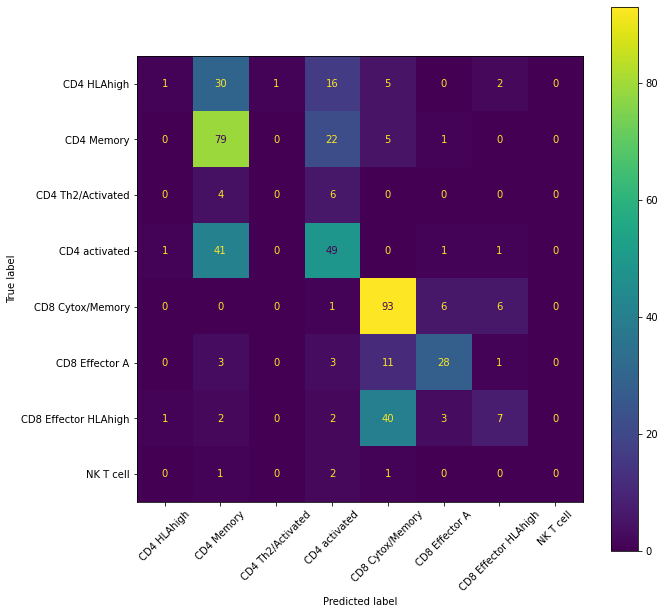

In [9]:


rf_class = LogisticRegression(random_state=2)
rf_class.fit(X = X_scaled[CARs+cell_type_marker], y = X_scaled["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled[CARs+cell_type_marker])
y_pred_train = rf_class.predict(X = X_scaled[CARs+cell_type_marker])

score_test = balanced_accuracy_score(y_true = X_test_scaled["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled["function_encoded"], y_pred_test, target_names=cell_functions,
                            zero_division="warn" ))

fig, ax = plt.subplots(figsize=(10, 10))
cm = sklearn.metrics.confusion_matrix(X_test_scaled["function_encoded"], y_pred_test, labels=[0,1,2,3, 4, 5, 6, 7])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cell_functions)
disp.plot(ax = ax)
disp.ax_.set_xticklabels(disp.ax_.get_xmajorticklabels(), rotation = 45)

plt.show()

## Separate CD4 and CD8 for comparison with the domain name
### Predict from CAR expression

In [10]:
expression_sc_CD4 = expression_sc[expression_sc['Type']=="CD4"]
expression_sc_CD8 = expression_sc[expression_sc['Type']=="CD8"]

X_CD4, X_test_CD4 = train_test_split(expression_sc_CD4, test_size=0.1, random_state=1)
scaler_CD4 = MinMaxScaler()
X_scaled_CD4 = X_CD4.copy()
X_test_scaled_CD4 = X_test_CD4.copy()
X_scaled_CD4[TFs + CARs ] = scaler_CD4.fit_transform(X_CD4[TFs + CARs ])
X_test_scaled_CD4[TFs + CARs ] = scaler.transform(X_test_CD4[TFs + CARs ])


X_CD8, X_test_CD8 = train_test_split(expression_sc_CD8, test_size=0.1, random_state=1)
scaler_CD8 = MinMaxScaler()
X_scaled_CD8 = X_CD8.copy()
X_test_scaled_CD8 = X_test_CD8.copy()
X_scaled_CD8[TFs + CARs] = scaler_CD8.fit_transform(X_CD8[TFs + CARs ])
X_test_scaled_CD8[TFs + CARs] = scaler.transform(X_test_CD8[TFs + CARs ])



/home/ubuntu/storage/miniconda3/envs/dev_fuzzy/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- CD4
- CD8A
- CD8B

  warnings.warn(message, FutureWarning)


ValueError: X has 48 features, but MinMaxScaler is expecting 51 features as input.

In [ ]:
rf_class = LogisticRegression(random_state=2)
rf_class.fit(X = X_scaled_CD4[CARs], y = X_scaled_CD4["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled_CD4[CARs])
y_pred_train = rf_class.predict(X = X_scaled_CD4[CARs])

score_test = balanced_accuracy_score(y_true = X_test_scaled_CD4["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled_CD4["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled_CD4["function_encoded"], y_pred_test, target_names=cell_functions[0:4],
                            zero_division="warn" ))

fig, ax = plt.subplots(figsize=(10, 10))
cm = sklearn.metrics.confusion_matrix(X_test_scaled_CD4["function_encoded"], y_pred_test, labels=[0,1,2,3])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cell_functions[0:4])
disp.plot(ax = ax)
disp.ax_.set_xticklabels(disp.ax_.get_xmajorticklabels(), rotation = 45)

plt.show()

In [ ]:
rf_class = LogisticRegression(random_state=2)
rf_class.fit(X = X_scaled_CD8[CARs], y = X_scaled_CD8["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled_CD8[CARs])
y_pred_train = rf_class.predict(X = X_scaled_CD8[CARs])

score_test = balanced_accuracy_score(y_true = X_test_scaled_CD8["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled_CD8["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled_CD8["function_encoded"], y_pred_test, target_names=cell_functions[4:8],
                            zero_division="warn" ))

fig, ax = plt.subplots(figsize=(10, 10))
cm = sklearn.metrics.confusion_matrix(X_test_scaled_CD8["function_encoded"], y_pred_test, labels=[4, 5, 6, 7])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cell_functions[4:8])
disp.plot(ax = ax)
disp.ax_.set_xticklabels(disp.ax_.get_xmajorticklabels(), rotation = 45)

plt.show()

### Predict from TF expression

In [ ]:
rf_class = LogisticRegression(random_state=2)
rf_class.fit(X = X_scaled_CD4[TFs], y = X_scaled_CD4["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled_CD4[TFs])
y_pred_train = rf_class.predict(X = X_scaled_CD4[TFs])

score_test = balanced_accuracy_score(y_true = X_test_scaled_CD4["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled_CD4["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled_CD4["function_encoded"], y_pred_test, target_names=cell_functions[0:4],
                            zero_division="warn" ))

fig, ax = plt.subplots(figsize=(10, 10))
cm = sklearn.metrics.confusion_matrix(X_test_scaled_CD4["function_encoded"], y_pred_test, labels=[0,1,2,3])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cell_functions[0:4])
disp.plot(ax = ax)
disp.ax_.set_xticklabels(disp.ax_.get_xmajorticklabels(), rotation = 45)

plt.show()

In [ ]:
rf_class = LogisticRegression(random_state=2)
rf_class.fit(X = X_scaled_CD8[TFs], y = X_scaled_CD8["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled_CD8[TFs])
y_pred_train = rf_class.predict(X = X_scaled_CD8[TFs])

score_test = balanced_accuracy_score(y_true = X_test_scaled_CD8["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled_CD8["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled_CD8["function_encoded"], y_pred_test, target_names=cell_functions[4:8],
                            zero_division="warn" ))

fig, ax = plt.subplots(figsize=(10, 10))
cm = sklearn.metrics.confusion_matrix(X_test_scaled_CD8["function_encoded"], y_pred_test, labels=[4, 5, 6, 7])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cell_functions[4:8])
disp.plot(ax = ax)
disp.ax_.set_xticklabels(disp.ax_.get_xmajorticklabels(), rotation = 45)

plt.show()

# Parameter exploration for the random forest

In [ ]:
rf = RandomForestClassifier(random_state=2)
param_dict = {"max_depth" : [None, 1000, 500, 100], 
              "min_samples_split" : [2, 10, 50, 100],
             "min_samples_leaf" : [1, 10, 100, 500, 1000],
             "max_leaf_nodes" : [None, 3000, 1000, 500], 
             "ccp_alpha" : [0, 0.01, 0.1, 1, 5 ]}

grid1 = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    scoring="balanced_accuracy",
                    verbose=3,
                    return_train_score=True,
                    refit=True, 
                    cv = 2)
grid2 = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    scoring="balanced_accuracy",
                    verbose=3,
                    return_train_score=True,
                    refit=True, 
                    cv = 2)

In [ ]:
print(grid1.best_estimator_)
print(grid1.best_score_)

In [ ]:
print(grid2.best_estimator_)
print(grid2.best_score_)

# Classification from TF expression

In [ ]:

rf_class = RandomForestClassifier(random_state=2)
rf_class.fit(X = X[TFs], y = X["function_encoded"])

y_pred_test = rf_class.predict(X = X_test[TFs])
y_pred_train = rf_class.predict(X = X[TFs])

score_test = balanced_accuracy_score(y_true = X_test["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test["function_encoded"], y_pred_test, target_names=cell_functions,
                            zero_division="warn" ))

In [ ]:


rf_class = RandomForestClassifier(random_state=2)
rf_class.fit(X = X[TFs+cell_type_marker], y = X["function_encoded"])

y_pred_test = rf_class.predict(X = X_test[TFs+cell_type_marker])
y_pred_train = rf_class.predict(X = X[TFs+cell_type_marker])

score_test = balanced_accuracy_score(y_true = X_test["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test["function_encoded"], y_pred_test, target_names=cell_functions,
                            zero_division="warn" ))

In [ ]:

rf_class = LogisticRegression(random_state=2, max_iter = 1000)
rf_class.fit(X = X_scaled[TFs], y = X_scaled["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled[TFs])
y_pred_train = rf_class.predict(X = X_scaled[TFs])

score_test = balanced_accuracy_score(y_true = X_test_scaled["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled["function_encoded"], y_pred_test, target_names=cell_functions,
                            zero_division="warn" ))

In [ ]:


rf_class = LogisticRegression(random_state=2, max_iter = 1000)
rf_class.fit(X = X_scaled[TFs+cell_type_marker], y = X_scaled["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled[TFs+cell_type_marker])
y_pred_train = rf_class.predict(X = X_scaled[TFs+cell_type_marker])

score_test = balanced_accuracy_score(y_true = X_test_scaled["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled["function_encoded"], y_pred_test, target_names=cell_functions,
                            zero_division="warn" ))

## Classification from TF raw counts

In [ ]:
raw_counts = pd.read_csv("../../CAR_data/raw_counts_post_qc_genes_of_interest_celltypes.csv", index_col = 0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [ ]:
raw_counts

In [ ]:
raw_counts["function_encoded"] = raw_counts["cell_type"].apply(encode_function, args = (cell_functions,))
raw_counts_CD4 = raw_counts[raw_counts['Type']=="CD4"]
raw_counts_CD8 = raw_counts[raw_counts['Type']=="CD8"]

X_CD4_raw, X_test_CD4_raw = train_test_split(raw_counts_CD4, test_size=0.1, random_state=2)
scaler_CD4_raw = MinMaxScaler()
X_scaled_CD4_raw = X_CD4_raw.copy()
X_test_scaled_CD4_raw = X_test_CD4_raw.copy()
X_scaled_CD4_raw[TFs + CARs ] = scaler_CD4_raw.fit_transform(X_CD4_raw[TFs + CARs ])
X_test_scaled_CD4_raw[TFs + CARs ] = scaler_CD4_raw.transform(X_test_CD4_raw[TFs + CARs ])


X_CD8_raw, X_test_CD8_raw = train_test_split(raw_counts_CD8, test_size=0.1, random_state=2)
scaler_CD8_raw = MinMaxScaler()
X_scaled_CD8_raw = X_CD8_raw.copy()
X_test_scaled_CD8_raw = X_test_CD8_raw.copy()
X_scaled_CD8_raw[TFs + CARs] = scaler_CD8_raw.fit_transform(X_CD8_raw[TFs + CARs ])
X_test_scaled_CD8_raw[TFs + CARs] = scaler_CD8_raw.transform(X_test_CD8_raw[TFs + CARs ])

In [ ]:
rf_class = LogisticRegression(random_state=2)
rf_class.fit(X = X_scaled_CD4_raw[TFs], y = X_scaled_CD4_raw["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled_CD4_raw[TFs])
y_pred_train = rf_class.predict(X = X_scaled_CD4_raw[TFs])

score_test = balanced_accuracy_score(y_true = X_test_scaled_CD4_raw["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled_CD4_raw["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled_CD4_raw["function_encoded"], y_pred_test, target_names=cell_functions[0:4],
                            zero_division="warn" ))

fig, ax = plt.subplots(figsize=(10, 10))
cm = sklearn.metrics.confusion_matrix(X_test_scaled_CD4_raw["function_encoded"], y_pred_test, labels=[0,1,2,3])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cell_functions[0:4])
disp.plot(ax = ax)
disp.ax_.set_xticklabels(disp.ax_.get_xmajorticklabels(), rotation = 45)

plt.show()

In [ ]:
rf_class = LogisticRegression(random_state=2)
rf_class.fit(X = X_scaled_CD8_raw[TFs], y = X_scaled_CD8_raw["function_encoded"])

y_pred_test = rf_class.predict(X = X_test_scaled_CD8_raw[TFs])
y_pred_train = rf_class.predict(X = X_scaled_CD8_raw[TFs])

score_test = balanced_accuracy_score(y_true = X_test_scaled_CD8_raw["function_encoded"],
                              y_pred = y_pred_test
                             )
score_train = balanced_accuracy_score(y_true = X_scaled_CD8_raw["function_encoded"],
                              y_pred = y_pred_train
                             )
print(f" Mean accuracy: train = {score_train}, \n Mean accuracy: test = {score_test}")

#print(best_classifier.predict_proba(validation_inputs_5_CD8))

print("Classification report") 
print(classification_report(X_test_scaled_CD8_raw["function_encoded"], y_pred_test, target_names=cell_functions[4:8],
                            zero_division="warn" ))

fig, ax = plt.subplots(figsize=(10, 10))
cm = sklearn.metrics.confusion_matrix(X_test_scaled_CD8_raw["function_encoded"], y_pred_test, labels=[4, 5, 6, 7])
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cell_functions[4:8])
disp.plot(ax = ax)
disp.ax_.set_xticklabels(disp.ax_.get_xmajorticklabels(), rotation = 45)

plt.show()